In [1]:
%matplotlib inline

import stumpy
import pandas as pd
import numpy as np
from IPython.display import IFrame
import matplotlib.pyplot as plt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [2]:
IFrame(width="560", height="315", src="https://www.youtube.com/embed/HAA__AW3I1M")

In [3]:
queen_df = pd.read_csv("https://zenodo.org/record/4294912/files/queen.csv?download=1")
vanilla_ice_df = pd.read_csv("https://zenodo.org/record/4294912/files/vanilla_ice.csv?download=1")

print("Length of Queen dataset : " , queen_df.size)
print("Length of Vanilla ice dataset : " , vanilla_ice_df.size)

Length of Queen dataset :  24289
Length of Vanilla ice dataset :  23095


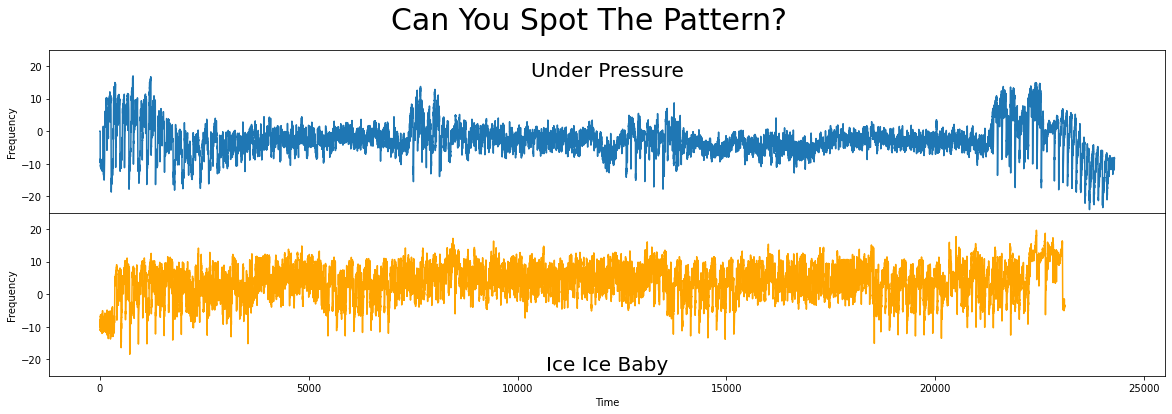

In [4]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Can You Spot The Pattern?', fontsize='30')

axs[0].set_title('Under Pressure', fontsize=20, y=0.8)
axs[1].set_title('Ice Ice Baby',  fontsize=20, y=0)

axs[1].set_xlabel('Time')

axs[0].set_ylabel('Frequency')
axs[1].set_ylabel('Frequency')

ylim_lower = -25
ylim_upper = 25
axs[0].set_ylim(ylim_lower, ylim_upper)
axs[1].set_ylim(ylim_lower, ylim_upper)

axs[0].plot(queen_df['under_pressure'])
axs[1].plot(vanilla_ice_df['ice_ice_baby'], c='orange')

plt.show()

In [5]:
m = 500
queen_mp = stumpy.stump(T_A = queen_df['under_pressure'],
                        m = m,
                        T_B = vanilla_ice_df['ice_ice_baby'],
                        ignore_trivial = False)

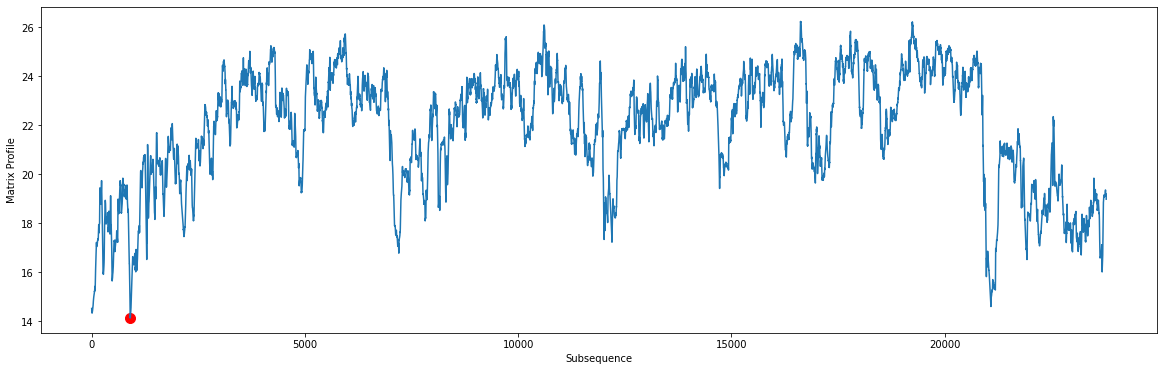

In [6]:
queen_motif_index = queen_mp[:, 0].argmin()

plt.xlabel('Subsequence')
plt.ylabel('Matrix Profile')

plt.scatter(queen_motif_index,
               queen_mp[queen_motif_index, 0],
               c='red',
               s=100)

plt.plot(queen_mp[:,0])

plt.show()

In [7]:
print(f'The motif is located at index {queen_motif_index} of "Under Pressure"')

The motif is located at index 904 of "Under Pressure"


In [8]:
vanilla_ice_motif_index = queen_mp[queen_motif_index, 1]
print(f'The motif is located at index {vanilla_ice_motif_index} of "Ice Ice Baby"')

The motif is located at index 288 of "Ice Ice Baby"


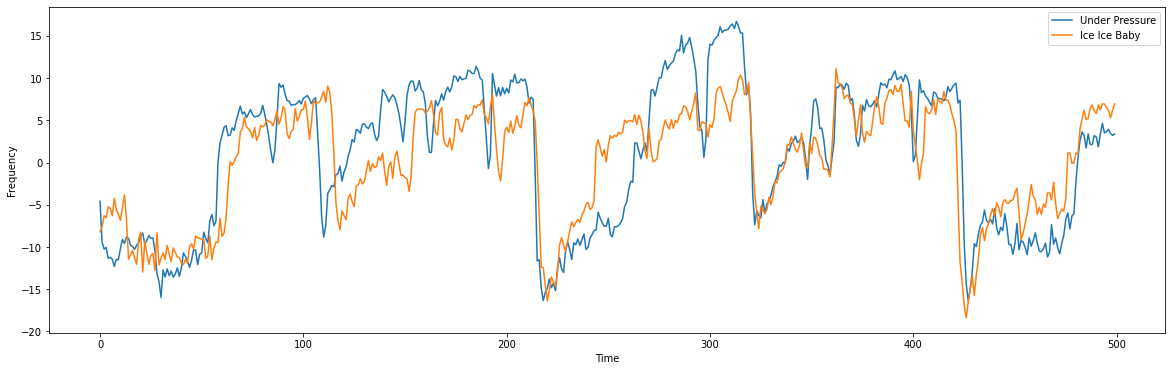

In [9]:
plt.plot(queen_df.iloc[queen_motif_index : queen_motif_index + m].values, label='Under Pressure')
plt.plot(vanilla_ice_df.iloc[vanilla_ice_motif_index:vanilla_ice_motif_index+m].values, label='Ice Ice Baby')

plt.xlabel('Time')
plt.ylabel('Frequency')

plt.legend()

plt.show()

In [10]:
%matplotlib inline

import stumpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import cycle, combinations
from matplotlib.patches import Rectangle
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.special import comb

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [11]:
sentence_idx = [6, 7, 9, 10, 16, 24]
Ts = [None] * len(sentence_idx)
fs = 50  # eog signal was downsampled to 50 Hz

for i, s in enumerate(sentence_idx):
    Ts[i] = pd.read_csv(f'https://zenodo.org/record/4288978/files/EOG_001_01_{s:03d}.csv?download=1').iloc[:, 0].values

# the literal sentences
sentences = pd.read_csv(f'https://zenodo.org/record/4288978/files/test_sent.jp.csv?download=1', index_col=0)

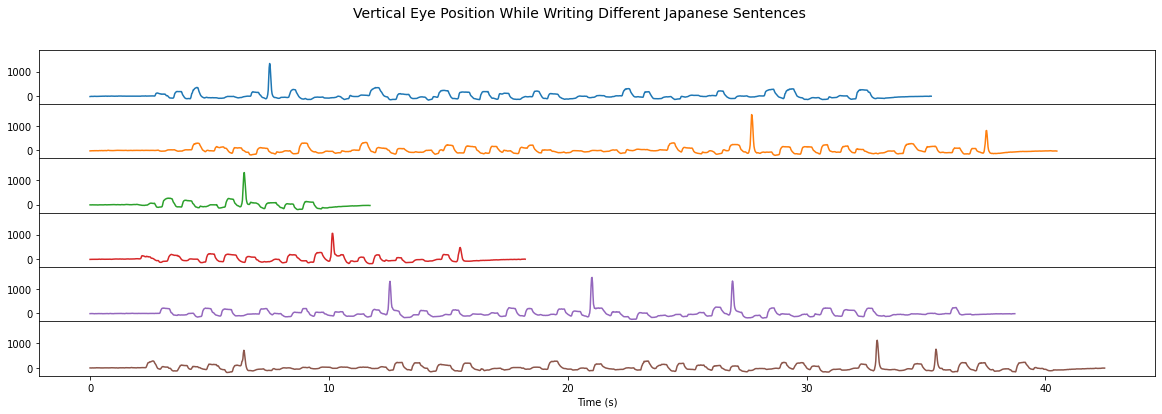

In [12]:
def plot_vertical_eog():
    fig, ax = plt.subplots(6, sharex=True, sharey=True)
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = cycle(prop_cycle.by_key()['color'])
    for i, e in enumerate(Ts):
        ax[i].plot(np.arange(0, len(e)) / fs, e, color=next(colors))
        ax[i].set_ylim((-330, 1900))
    plt.subplots_adjust(hspace=0)
    plt.xlabel('Time (s)')
    return ax

plot_vertical_eog()
plt.suptitle('Vertical Eye Position While Writing Different Japanese Sentences', fontsize=14)
plt.show()

In [13]:
m = fs
radius, Ts_idx, subseq_idx = stumpy.ostinato(Ts, m)
print(f'Found Best Radius {np.round(radius, 2)} in time series {Ts_idx} starting at subsequence index location {subseq_idx}.')


Found Best Radius 0.87 in time series 4 starting at subsequence index location 1271.


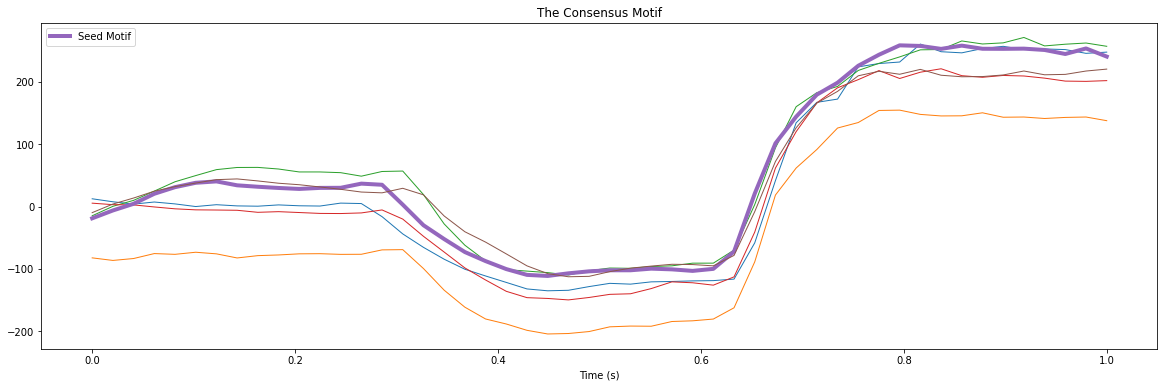

In [14]:
seed_motif = Ts[Ts_idx][subseq_idx : subseq_idx + m]
x = np.linspace(0,1,50)
nn = np.zeros(len(Ts), dtype=np.int64)
nn[Ts_idx] = subseq_idx
for i, e in enumerate(Ts):
    if i != Ts_idx:
        nn[i] = np.argmin(stumpy.core.mass(seed_motif, e))
        lw = 1
        label = None
    else:
        lw = 4
        label = 'Seed Motif'
    plt.plot(x, e[nn[i]:nn[i]+m], lw=lw, label=label)
plt.title('The Consensus Motif')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

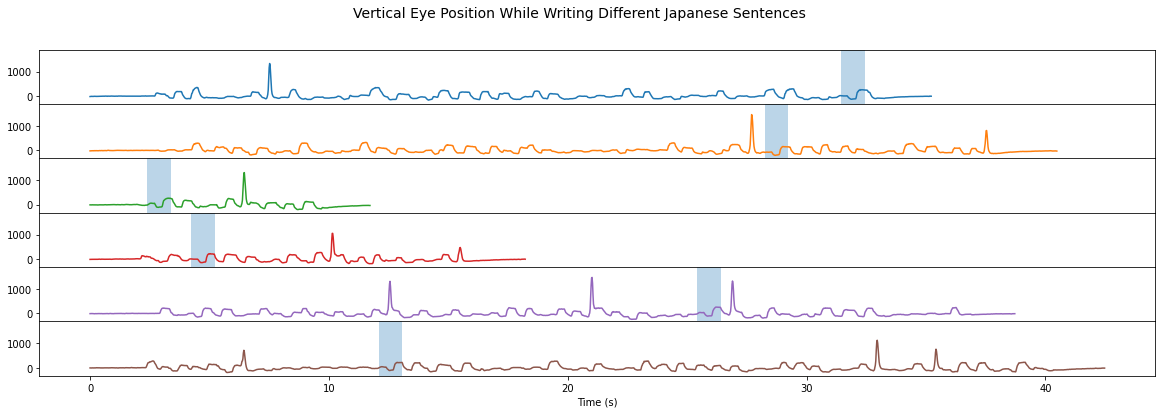

In [15]:
ax = plot_vertical_eog()
for i in range(len(Ts)):
    y = ax[i].get_ylim()
    r = Rectangle((nn[i] / fs, y[0]), 1, y[1]-y[0], alpha=0.3)
    ax[i].add_patch(r)
plt.suptitle('Vertical Eye Position While Writing Different Japanese Sentences', fontsize=14)
plt.show()

In [16]:
animals = ['python', 'hippo', 'red_flying_fox', 'alpaca']
data = {}
for animal in animals:
    data[animal] = pd.read_csv(f"https://zenodo.org/record/4289120/files/{animal}.csv?download=1").iloc[:,0].values

colors = {'python': 'tab:blue', 'hippo': 'tab:green', 'red_flying_fox': 'tab:purple', 'alpaca': 'tab:red'}

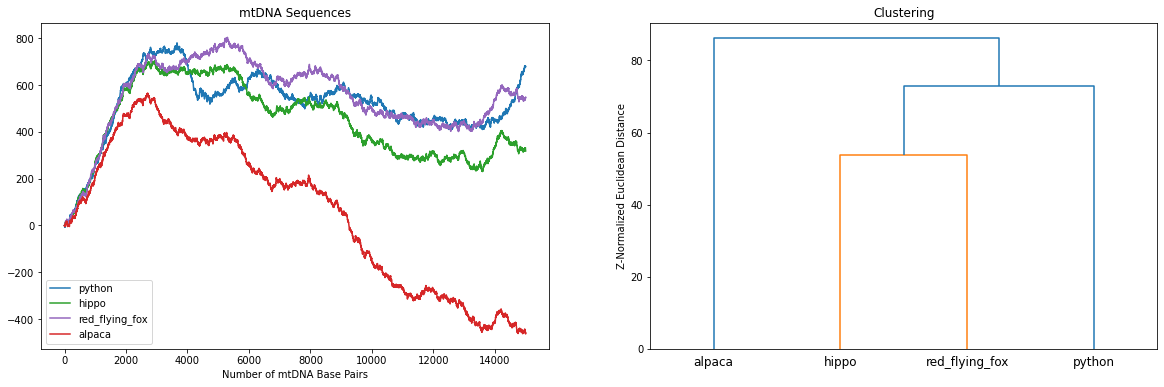

In [17]:
fig, ax = plt.subplots(ncols=2)

# sequences in Fig 9 left
truncate = 15000
for k, v in data.items():
    ax[0].plot(v[:truncate], label=k, color=colors[k])
ax[0].legend()
ax[0].set_xlabel('Number of mtDNA Base Pairs')
ax[0].set_title('mtDNA Sequences')

# clustering in Fig 9 left
truncate = 16000
dp = np.zeros(int(comb(4, 2)))
for i, a_c in enumerate(combinations(data.keys(), 2)):
    dp[i] = stumpy.core.mass(data[a_c[0]][:truncate], data[a_c[1]][:truncate])
Z = linkage(dp, optimal_ordering=True)
dendrogram(Z, labels=[k for k in data.keys()], ax=ax[1])
ax[1].set_ylabel('Z-Normalized Euclidean Distance')
ax[1].set_title('Clustering')
plt.show()

In [18]:
m = 1000
bsf_radius, bsf_Ts_idx, bsf_subseq_idx = stumpy.ostinato(list(data.values()), m)
print(f'Found best radius {np.round(bsf_radius, 2)} in time series {bsf_Ts_idx} starting at subsequence index location {bsf_subseq_idx}.')

Found best radius 2.73 in time series 1 starting at subsequence index location 602.


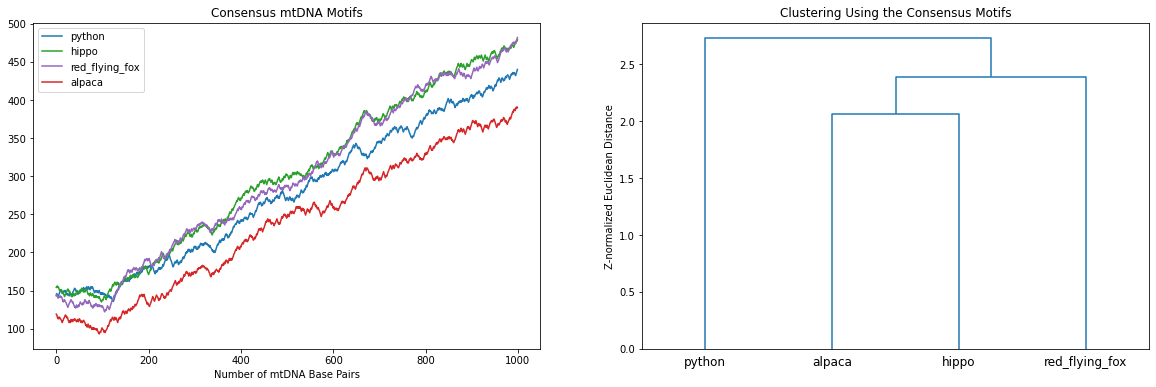

In [19]:
consensus_motifs = {}
best_motif = list(data.items())[bsf_Ts_idx][1][bsf_subseq_idx : bsf_subseq_idx + m]
for i, (k, v) in enumerate(data.items()):
    if i == bsf_Ts_idx:
        consensus_motifs[k] = best_motif
    else:
        idx = np.argmin(stumpy.core.mass(best_motif, v))
        consensus_motifs[k] = v[idx : idx + m]

fig, ax = plt.subplots(ncols=2)
# plot the consensus motifs
for animal, motif in consensus_motifs.items():
    ax[0].plot(motif, label=animal, color=colors[animal])
ax[0].legend()
# cluster consensus motifs
dp = np.zeros(int(comb(4, 2)))
for i, motif in enumerate(combinations(list(consensus_motifs.values()), 2)):
    dp[i] = stumpy.core.mass(motif[0], motif[1])
Z = linkage(dp, optimal_ordering=True)
dendrogram(Z, labels=[k for k in consensus_motifs.keys()])

ax[0].set_title('Consensus mtDNA Motifs')
ax[0].set_xlabel('Number of mtDNA Base Pairs')
ax[1].set_title('Clustering Using the Consensus Motifs')
ax[1].set_ylabel('Z-normalized Euclidean Distance')
plt.show()